In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
%load_ext autoreload
%autoreload 2





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = np.loadtxt('../digg/digg.txt',dtype=int,comments='%')
# converting edge weight information into graph
G = nx.Graph()
for i in tqdm(range(data.shape[0])):
    if G.has_edge(data[i,0],data[i,1]):
        G[data[i,0]][data[i,1]]['weight']+=data[i,2]
    else:
        G.add_edge(data[i,0],data[i,1],weight=data[i,2])
for e in G.edges_iter():
    G[e[0]][e[1]]['weight_inv']=1/float(G[e[0]][e[1]]['weight'])
    G[e[0]][e[1]]['weight_inv_exp']=np.exp(-float(G[e[0]][e[1]]['weight'])/3.0)

        

<IPython.core.display.Javascript object>


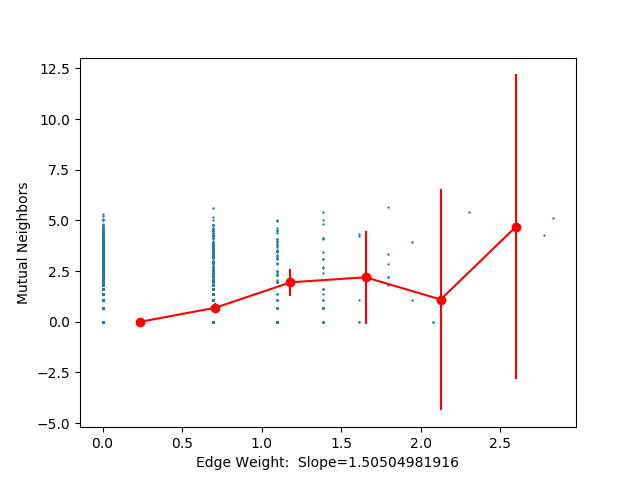

In [9]:
pwl=mutual(G)
#plot_log_log(pwl)
plot_log_log_summary(pwl,"Edge Weight", "Mutual Neighbors", B=6,summary=np.median)

<IPython.core.display.Javascript object>


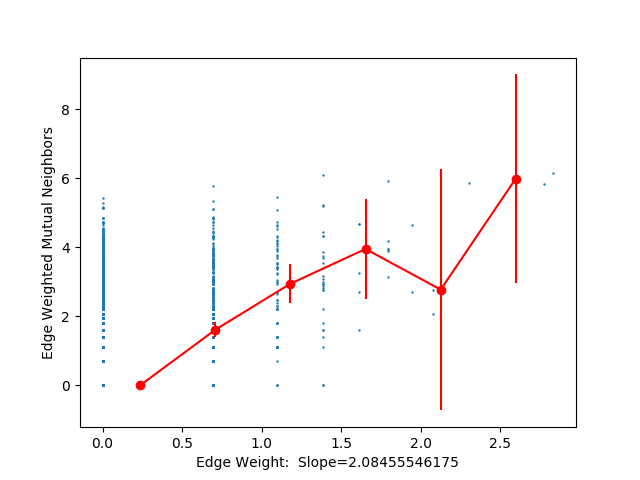

In [10]:
#pwl=sim_score_1(G)
pwl=mutual_ew(G)
#plot_log_log(pwl)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Mutual Neighbors", B=6,summary=np.median)

<IPython.core.display.Javascript object>


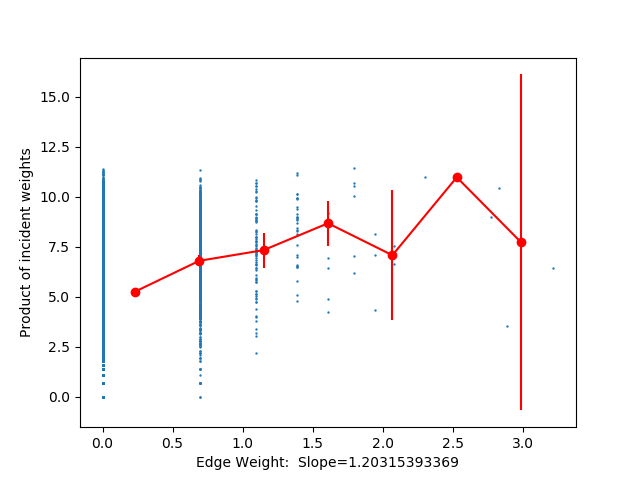

/Users/vaishnan/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1903: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/Users/vaishnan/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


In [11]:
pwl=ewpl(G)
#plot_log_log(pwl)
plot_log_log_summary(pwl,"Edge Weight", "Product of incident weights", summary=np.median,B=7)

<IPython.core.display.Javascript object>


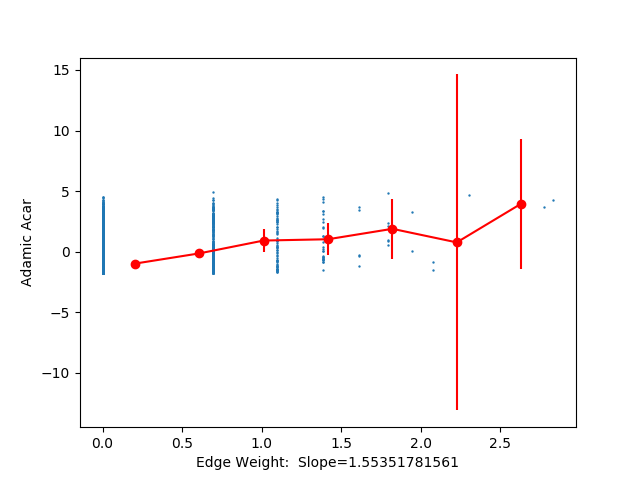

In [12]:
pwl=adamic_acar(G)
plot_log_log_summary(pwl,"Edge Weight", "Adamic Acar", B=7,summary=np.mean)



<IPython.core.display.Javascript object>


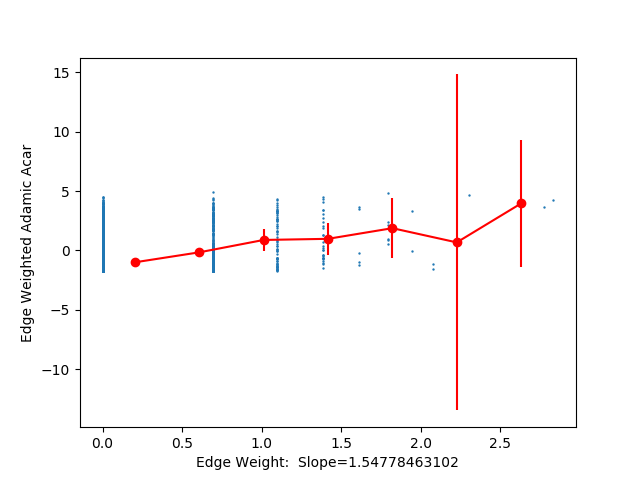

In [13]:
pwl=adamic_acar_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Acar", B=7,summary=np.mean)

<IPython.core.display.Javascript object>


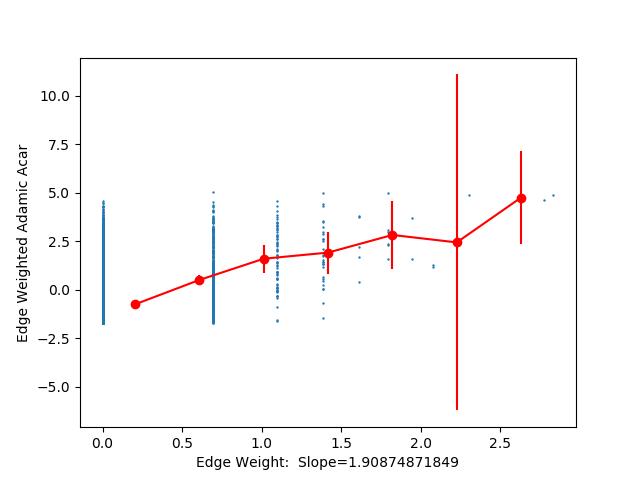

In [14]:
pwl=adamic_acar_ew_2(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Acar", B=7,summary=np.mean)